In [1]:
from funkcije import *

In [3]:
fc = biraj_bazu()

FileChooser(path='/home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija', filename='', title='…

In [4]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano



# short term energija, frejmovano
frame_length = 480
hop_length = frame_length//2

# mfccovi = np.empty((535, 20, 1000))
duzine = []


for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
          data, samplerate = librosa.load(fc.selected + filename) 
          duzina = len(data) * 1/samplerate
        
          duzine.append(duzina) 

In [5]:
# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

duzinatisine = []
odnostig = []
najduzaprica = []

#  frejmovano
frame_length = 100
hop_length = frame_length//2
granica = 0.01


for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
     # if True :
          data, samplerate = librosa.load(fc.selected + filename) 
          duzina = len(data) * 1/samplerate
          duzinatisinepriv = 0
          ptisina = 0
          trenprica = 0
          maxprica = 0
          for i in range (0, len(data), hop_length):
               engparceta = sum(abs(data[i:i+frame_length]**2))
               if engparceta < granica:
                    trenprica = 0
                    if ptisina == 0:
                         duzinatisinepriv = duzinatisinepriv + frame_length * 1/samplerate
                    else :
                         duzinatisinepriv = duzinatisinepriv + hop_length * 1/samplerate
                    ptisina = 1
               else: 
                    ptisina = 0
                    if trenprica == 0:
                         trenprica = frame_length * 1/samplerate
                    else :
                         trenprica = trenprica + hop_length * 1/samplerate
                    if trenprica > maxprica: maxprica = trenprica
          duzinatisine.append(duzinatisinepriv)
          najduzaprica.append(maxprica)

for i in range (0, len(duzine)):
     if duzinatisine[i] > 0:
          odnostig.append((duzine[i]-duzinatisine[i])/duzinatisine[i])
     else: odnostig.append(1)      



 

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

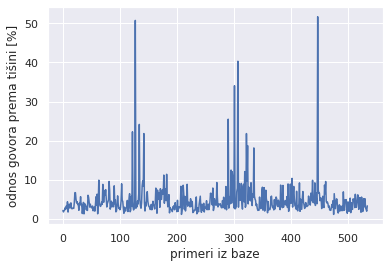

In [6]:
sns.set()
plt.plot(odnostig)
plt.ylabel("odnos govora prema tišini [%]")
plt.xlabel("primeri iz baze")
plt.figure

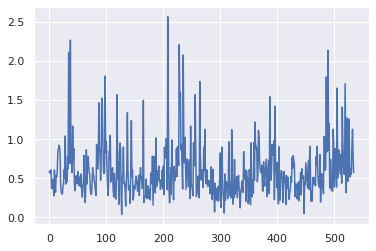

In [7]:
# plt.xkcd()
plt.plot(duzinatisine)


In [8]:
sum(duzinatisine)

315.85034013605514

---
### sortiramo ove duzine po emocijama

In [29]:
emo = ['W', 'L', 'E', 'A', 'F', 'T', 'N'] # ovo bi mogli konstantno definisati

tig_odnos_emo = []
duzine_emo = []
for i in range(7 * 2):
     tig_odnos_emo.append([])
     duzine_emo.append([])

duzine_duze_krace = [[],[]]

# prolazenje kroz sve fajlove u folderu

directory = os.fsencode(fc.selected)
    
lista_fajlova = os.listdir(directory)
lista_fajlova.sort() # sortirano

i = 0
for file in lista_fajlova:
     filename = os.fsdecode(file)
     if filename.endswith(".wav"): 
          emocija = filename[5]
          duza_kraca = filename[2]

          indx = emo.index(emocija)

          tig_odnos_emo[indx].append(odnostig[i])
          
          if duza_kraca == 'a':
               duzine_emo[indx].append(duzine[i]) 
          else : 
               duzine_emo[indx+7].append(duzine[i]) 

          i+=1



{'whiskers': [<matplotlib.lines.Line2D at 0x7f687f37b130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f687f37b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f687f3ead90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f687f37be80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f687f3861f0>,
 'means': []}

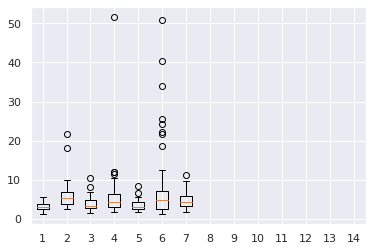

In [30]:
plt.boxplot(tig_odnos_emo)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f68801d3430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f687f54cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f68801d3b20>,
 'medians': [<matplotlib.lines.Line2D at 0x7f687f613280>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f686f26d190>,
 'means': []}

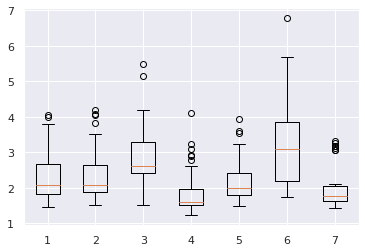

In [32]:
plt.boxplot(duzine_emo[:7])

ERROR! Session/line number was not unique in database. History logging moved to new session 361


{'whiskers': [<matplotlib.lines.Line2D at 0x7f683a25b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f683a25bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f683a25b310>,
 'medians': [<matplotlib.lines.Line2D at 0x7f683a264430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f683a264790>,
 'means': []}

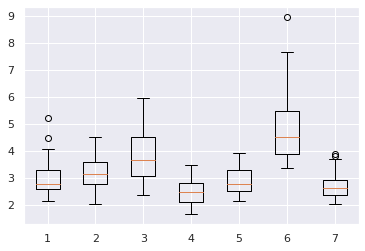

In [33]:
plt.boxplot(duzine_emo[7:])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f687f3ff190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f687f3ff850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f687f45eee0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f687f3ffee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f687f40a250>,
 'means': []}

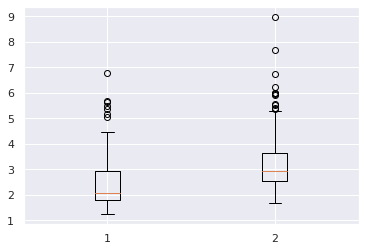

In [28]:
plt.boxplot(duzine_duze_krace)